# Question 3
## Arturo Fornés Arvayo A01227071

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier

import csv
import pandas as pd

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
df = pd.read_csv("decisiontree.csv")

In [4]:
df

,x,y,z,class
0,0,0,0,f
1,0,0,1,f
2,0,1,0,f
3,0,1,1,t
4,1,0,0,f
5,1,0,1,t
6,1,1,0,t
7,1,1,1,f


In [5]:
y = df["class"]
X = df.drop("class", axis=1)

In [6]:
X

,x,y,z
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [7]:
y

0    f
1    f
2    f
3    t
4    f
5    t
6    t
7    f
Name: class, dtype: object

In [8]:
classifier = DecisionTreeClassifier()

In [9]:
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
to_predict = pd.DataFrame([{"x": 0, "y": 0, "z":0}])
print("Predicting:\n", to_predict)
actual_value = y[0]
print("Should predict:", actual_value)
predicted_value = classifier.predict(to_predict)
print("Predicted:", predicted_value)
print("Correct?", predicted_value[0] == actual_value)

Predicting:
    x  y  z
0  0  0  0
Should predict: f
Predicted: ['f']
Correct? True


In [21]:
predicted = classifier.predict(X)

In [22]:
for p_y, a_y in zip(predicted, y):
    print("Predicted", p_y, "should have predicted", a_y, "Correct?", p_y == a_y)

Predicted f should have predicted f Correct? True
Predicted f should have predicted f Correct? True
Predicted f should have predicted f Correct? True
Predicted t should have predicted t Correct? True
Predicted f should have predicted f Correct? True
Predicted t should have predicted t Correct? True
Predicted t should have predicted t Correct? True
Predicted f should have predicted f Correct? True


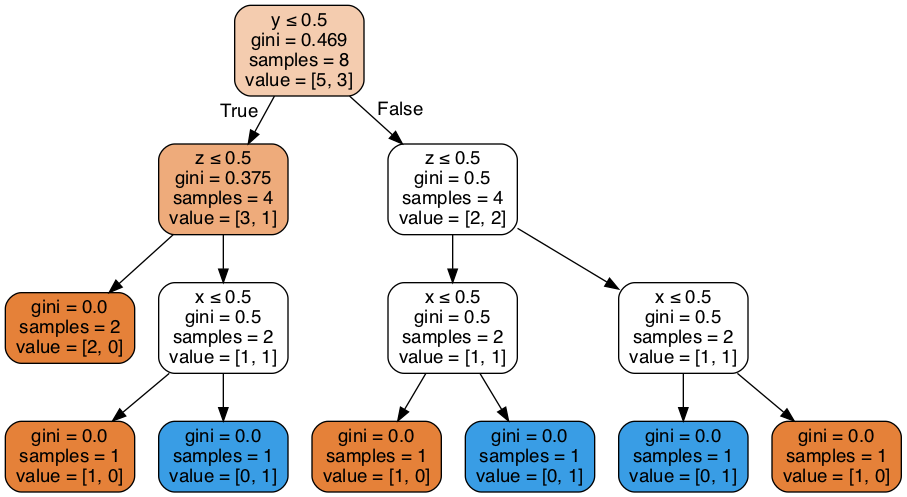

In [23]:
feature_names = ["x", "y", "z"]
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())